In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from wordcloud import WordCloud

In [2]:
# Set the style for the plots
plt.style.use('ggplot')

In [3]:
# Read the dataset into a DataFrame
df = pd.read_csv(r'C:\Users\mdsng\Downloads\NewSE\Reviews.csv')

In [4]:
# Display the shape of the original dataset and select the first 100000 sets.
print(df.shape)
df = df.head(100000)
print(df.shape)


(568454, 10)
(100000, 10)


In [5]:
# Display the first few rows of the DataFrame
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


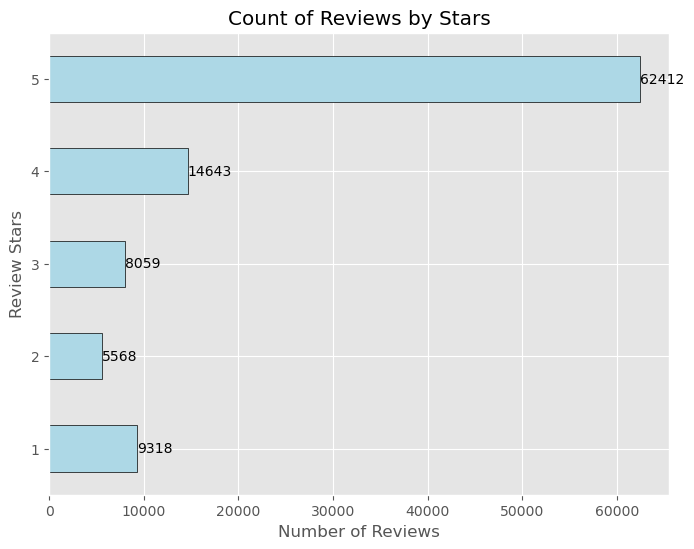

In [6]:
# Calculate the count of unique values and sort them
score_counts = df['Score'].value_counts().sort_index()

# Create a horizontal bar plot
ax = score_counts.plot(kind='barh',
                       color='lightblue',
                       edgecolor='black',
                       figsize=(8, 6))

# Add labels to each bar
for index, value in enumerate(score_counts):
    ax.text(value, index, str(value), ha='left', va='center')
    
# Set plot title and labels
ax.set_title('Count of Reviews by Stars')
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Review Stars')

# Show the plot
plt.show()


In [7]:
# using 'Time' column is present in the DataFrame
df['Time'] = pd.to_datetime(df['Time'], unit='s')

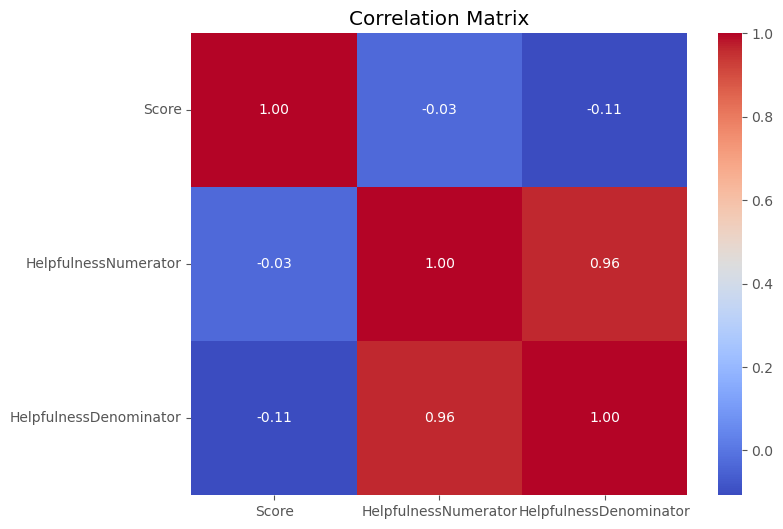

In [8]:
# correlation matrix of whole data set.
correlation_matrix = df[['Score', 'HelpfulnessNumerator', 'HelpfulnessDenominator']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [10]:
# SentimentIntensityAnalyzer from NLTK's VADER module
sia = SentimentIntensityAnalyzer()

In [11]:
# Apply sentiment analysis to the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [12]:
# Visualize compound sentiment scores by Insatgram star review through amazon
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

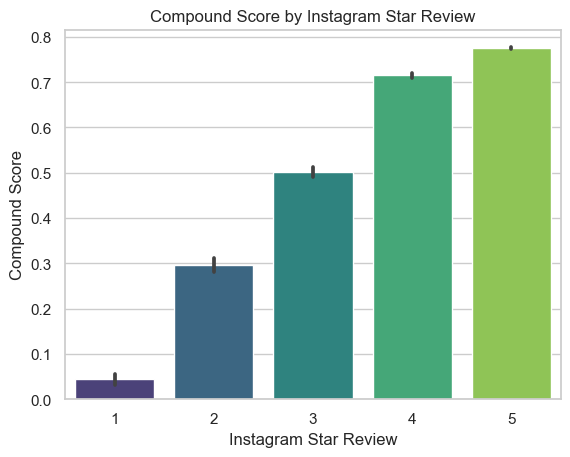

In [13]:
sns.set(style="whitegrid")
ax = sns.barplot(data=vaders, x='Score', y='compound', palette='viridis')
ax.set_title('Compound Score by Instagram Star Review')
ax.set_xlabel('Instagram Star Review')
ax.set_ylabel('Compound Score')
plt.show()


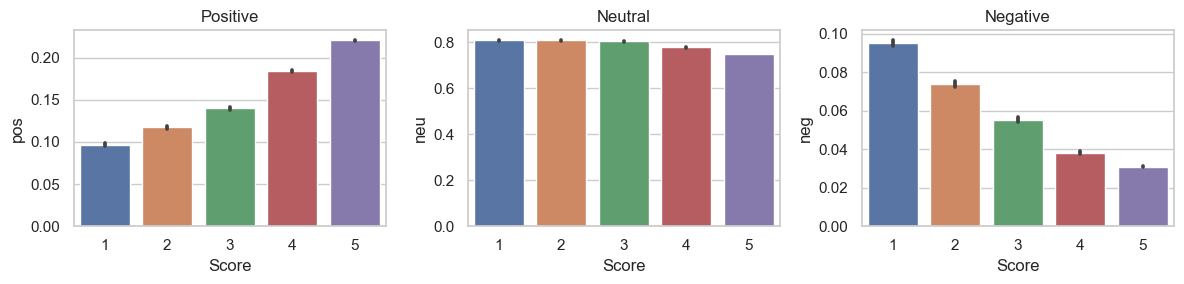

In [14]:
# Visualizing positive, neutral, and negative scores
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()



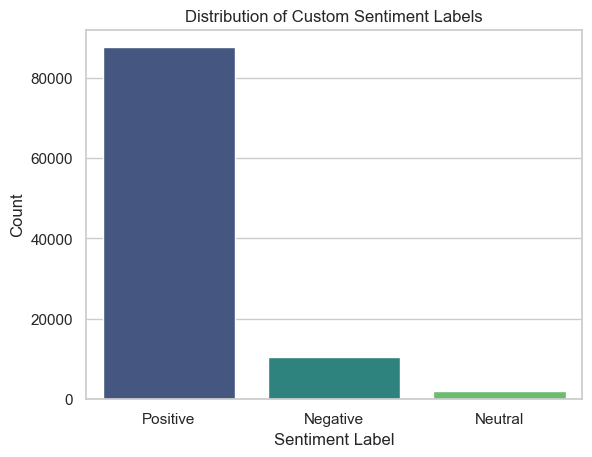

In [15]:
# Assuming a custom function to label sentiment
def label_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the custom function to create a new column
vaders['Sentiment_Label'] = vaders['compound'].apply(label_sentiment)

# Plot the distribution of custom sentiment labels
sns.countplot(x='Sentiment_Label', data=vaders, palette='viridis')
plt.title('Distribution of Custom Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

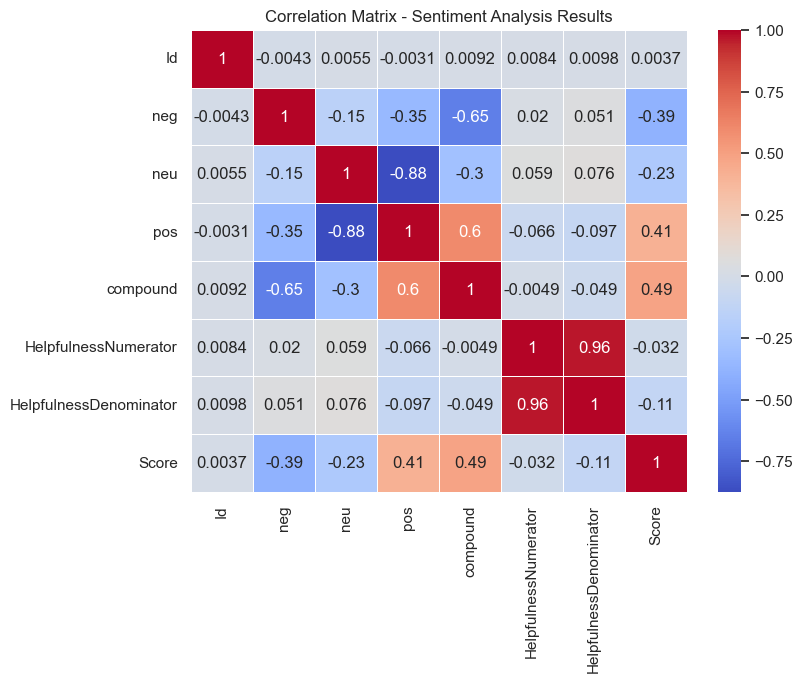

In [16]:
# Analyzing the correlation matrix using the sentiment analysis results

correlation_matrix_sentiment = vaders.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_sentiment, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix - Sentiment Analysis Results')
plt.show()


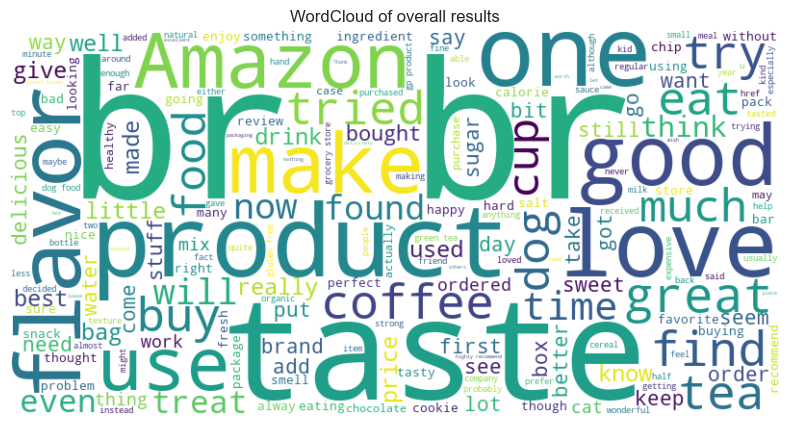

In [17]:
#'wordcloud'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of overall results')
plt.show()